### 4.3 수치 미분

#### 4.3.1 미분

만약 마라톤 선수가 처음부터 10분까지 2km씩 달렸다고 해보자. 이때 속도는 간단히 2 / 10 = 0.2km/s 이라고 계산할 수 있다. 즉 1분에 0.2km 만큼의 속도 (변화)로 뛰었다고 해석할 수 있는 것이다.  

여기서는 달린 거리가 시간에 대해 얼마나 변화했는지를 계산한다. 이는 평균속도를 구한 것인데, 미분은 특정 순간의 변화량을 뜻한다. 그래서 10분이라는 시간을 가능한 줄여서 한 순간의 변화량 (어느 순간의 속도)를 얻는 것이다. 이처럼 미분은 한순간의 변화량을 표시한 것이다.  

f(x)에 x에 대한 미분 (x에 대한 f(x)의 변화량)을 나타내는 기호이다. x의 작은 변화가 함수 f(x)를 얼마나 변ㅁ화시키느냐를 의미한다. 이때 시간의 작은 변화 h를 한없이 0에 가깝게 한다는 의미로 lim을 쓴다.

In [3]:
import numpy as np

# 나쁜 구현 예
def numerical_diff(f, x):
    h = 1e-50 # 소수점 아래 0이 50개
    return (f(x + h) - f(x)) / h

# 반올림 오차 문제를 일으킨다. 작은 값이 소수점 8자리 이하등 부터 생략되어 오차가 생기게 한다. 

print(np.float32(1e-50))

0.0


float32형의 32비트 부동소수점으로 나타내면 계산하는데 문제가 생긴다. 보통은 10^-4 값을 사용하여 좋은 결과를 얻는다고 한다.  
두번째로는 f의 차분과 관련되어 있다. 진정한 미분은 x 위치의 함수의 기울기에 해당하지만 (접선), 이번 구현은 x + h와 x 사이의 기울기에 해당되기에 일치하지는 않는다. h를 무한히 0으로 줄이는게 불가능해 생기는 한계이다. 그래서 이런 오차를 줄이기 위해 x + h와 x - h의 차분을 계산하는 방법을 쓴다. 중심차분, 중앙차분이라고도 불리운다.

차분이라 함은 임의의 두 점에서 함수 값들의 차이를 말한다.  
수치 미분은 근사치를 이용해서 아주 작은 차분으로 미분하는 것이다.  
해석적 미분은 수식을 전개해서 하는 미분이다.  

In [15]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x + h) - f(x - h)) / (2*h)

#### 4.3.2 수치 미분의 예

y = 0.01x^2 + 0.1x를 구현해보자. 차분을 이용한 수치미분과 해석적 미분의 값이 근사한 것을 볼 수 있다.

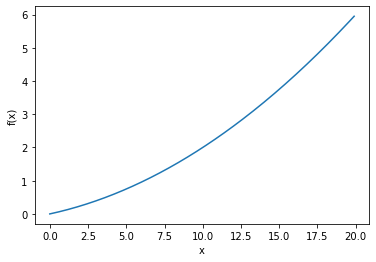

In [6]:
def function_1(x):
    return 0.01 * x ** 2 + 0.1 * x

import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1) # 0.0에서 20까지 0.1 간격의 배열 x를 만든다. 20은 미포함
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [18]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


#### 4.3.3 편미분

변수가 2개인 인수들의 제곱 합을 계산하는 식을 보자.  
이 식은 3차원으로 그려진다. 여기서는 변수가 2개이기에 어느 변수에 대한 미분이냐를 구분해야 하는데 이처럼 변수가 여럿인 함수에 대한 미분을 편미분이라 한다.  

편미분은 변수가 하나인 미분처럼 특정 장소의 기울기를 구한다. 다만 여러 변수 중 목표 변수 하나에 초점을 맞추고 다른 변수는 값을 고정한다. 

In [ ]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # return np.sum(x**2)

In [19]:
def function_tmp1(x0):
    return x0 * x0 + 4.0 ** 2.0 # x1은 4로 고정하고 x0 하나뿐인 함수에 대한 미분함수

def function_tmp2(x1):
    return 3.0 ** 2.0 + x1 * x1

print(numerical_diff(function_tmp1, 3.0))
print(numerical_diff(function_tmp2, 4.0))

6.00000000000378
7.999999999999119
